#  Train/Val split 

In [62]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State

# 데이터 로드
train_dataset = pd.read_csv('./time_series_covid_19_confirmed.csv')

# Country/Region 열 확인
countries = train_dataset['Country/Region'].unique()

# Dash 앱 초기화
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("COVID-19 Confirmed Cases by Country", style={'color': 'red'}),
    html.Div([
        html.Label("Select Countries:", style={'color': 'red'}),
        dcc.Checklist(
            id='country-checklist',
            options=[{'label': country, 'value': country} for country in countries],
            value=[countries[0]],  # 기본값으로 첫 번째 나라 선택
            labelStyle={'display': 'block', 'margin': '5px', 'color': 'red'},
            style={'height': '300px', 'overflowY': 'scroll', 'border': '1px solid #ccc', 'padding': '10px'}
        ),
        html.Button("Reset", id='reset-button', n_clicks=0, style={'margin-top': '10px'})
    ], style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top'}),
    html.Div([
        dcc.Graph(id='country-graph')
    ], style={'width': '65%', 'display': 'inline-block', 'verticalAlign': 'top'})
])

@app.callback(
    Output('country-checklist', 'value'),
    [Input('reset-button', 'n_clicks')]
)
def reset_checklist(n_clicks):
    return []

@app.callback(
    Output('country-graph', 'figure'),
    [Input('country-checklist', 'value')]
)
def update_graph(selected_countries):
    if not selected_countries:
        return go.Figure()

    fig = make_subplots(rows=len(selected_countries), cols=1, shared_xaxes=True, vertical_spacing=0.05)

    for i, country in enumerate(selected_countries):
        country_data = train_dataset[train_dataset['Country/Region'] == country].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()
        total_days = len(country_data)
        train_size = int(total_days * 0.8)
        train_dates = country_data.index[:train_size]
        val_dates = country_data.index[train_size:]

        fig.add_trace(
            go.Scatter(x=np.arange(len(train_dates)), y=country_data[train_dates], mode='lines+markers', name=f'{country} Train', marker=dict(color="dodgerblue"), showlegend=False),
            row=i+1, col=1
        )
        fig.add_trace(
            go.Scatter(x=np.arange(len(train_dates), len(train_dates) + len(val_dates)), y=country_data[val_dates], mode='lines+markers', name=f'{country} Validation', marker=dict(color="darkorange"), showlegend=False),
            row=i+1, col=1
        )

        fig.update_yaxes(title_text=country, row=i+1, col=1)

    fig.update_layout(height=300*len(selected_countries), width=800, title_text="Train (blue) vs. Validation (orange) sales")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


# 단순 접근법 분석 navie approach

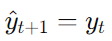
<br>
$
\hat{y}_{t+1} : 다음 예측량
$
<br>
$ y_t :현재 예측량 $

In [68]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State

# 데이터 로드
train_dataset = pd.read_csv('./time_series_covid_19_confirmed.csv')

# Country/Region 열 확인
countries = train_dataset['Country/Region'].unique()

# Dash 앱 초기화
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("COVID-19 Confirmed Cases by Country", style={'color': 'red'}),
    html.Div([
        html.Label("Select Countries:", style={'color': 'red'}),
        dcc.Checklist(
            id='country-checklist',
            options=[{'label': country, 'value': country} for country in countries],
            value=[countries[0]],  # 기본값으로 첫 번째 나라 선택
            labelStyle={'display': 'block', 'margin': '5px', 'color': 'red'},
            style={'height': '300px', 'overflowY': 'scroll', 'border': '1px solid #ccc', 'padding': '10px'}
        ),
        html.Button("Reset", id='reset-button', n_clicks=0, style={'margin-top': '10px'})
    ], style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top'}),
    html.Div([
        dcc.Graph(id='country-graph')
    ], style={'width': '65%', 'display': 'inline-block', 'verticalAlign': 'top'})
])

@app.callback(
    Output('country-checklist', 'value'),
    [Input('reset-button', 'n_clicks')]
)
def reset_checklist(n_clicks):
    return []

@app.callback(
    Output('country-graph', 'figure'),
    [Input('country-checklist', 'value')]
)
def update_graph(selected_countries):
    if not selected_countries:
        return go.Figure()

    fig = make_subplots(rows=len(selected_countries), cols=1, shared_xaxes=True, vertical_spacing=0.05)

    for i, country in enumerate(selected_countries):
        country_data = train_dataset[train_dataset['Country/Region'] == country].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()
        total_days = len(country_data)
        train_size = int(total_days * 0.8)
        train_data = country_data[:train_size].values
        val_data = country_data[train_size:].values

        # Naive approach predictions
        predictions = []
        for j in range(len(val_data)):
            if j == 0:
                predictions.append(train_data[-1])
            else:
                predictions.append(val_data[j - 1])

        # Plotting train, validation and predictions
        fig.add_trace(
            go.Scatter(x=np.arange(len(train_data)), y=train_data, mode='lines', marker=dict(color="dodgerblue"), name=f'{country} Train'),
            row=i+1, col=1
        )
        fig.add_trace(
            go.Scatter(x=np.arange(len(train_data), len(train_data) + len(val_data)), y=val_data, mode='lines', marker=dict(color="darkorange"), name=f'{country} Validation'),
            row=i+1, col=1
        )
        fig.add_trace(
            go.Scatter(x=np.arange(len(train_data), len(train_data) + len(val_data)), y=predictions, mode='lines', marker=dict(color="seagreen"), name=f'{country} Prediction'),
            row=i+1, col=1
        )

        fig.update_yaxes(title_text=country, row=i+1, col=1)

    fig.update_layout(height=300*len(selected_countries), width=800, title_text="Naive approach: Train (blue), Validation (orange), Predictions (green)")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


# moving average

In [69]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State

# 데이터 로드
train_dataset = pd.read_csv('./time_series_covid_19_confirmed.csv')

# Country/Region 열 확인
countries = train_dataset['Country/Region'].unique()

# Dash 앱 초기화
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("COVID-19 Confirmed Cases by Country", style={'color': 'red'}),
    html.Div([
        html.Label("Select Countries:", style={'color': 'red'}),
        dcc.Checklist(
            id='country-checklist',
            options=[{'label': country, 'value': country} for country in countries],
            value=[countries[0]],  # 기본값으로 첫 번째 나라 선택
            labelStyle={'display': 'block', 'margin': '5px', 'color': 'red'},
            style={'height': '300px', 'overflowY': 'scroll', 'border': '1px solid #ccc', 'padding': '10px'}
        ),
        html.Button("Reset", id='reset-button', n_clicks=0, style={'margin-top': '10px'})
    ], style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top'}),
    html.Div([
        dcc.Graph(id='country-graph')
    ], style={'width': '65%', 'display': 'inline-block', 'verticalAlign': 'top'})
])

@app.callback(
    Output('country-checklist', 'value'),
    [Input('reset-button', 'n_clicks')]
)
def reset_checklist(n_clicks):
    return []

@app.callback(
    Output('country-graph', 'figure'),
    [Input('country-checklist', 'value')]
)
def update_graph(selected_countries):
    if not selected_countries:
        return go.Figure()

    subplot_titles = [f"{country}" for country in selected_countries]
    fig = make_subplots(rows=len(selected_countries), cols=1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles=subplot_titles)

    for i, country in enumerate(selected_countries):
        country_data = train_dataset[train_dataset['Country/Region'] == country].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()
        total_days = len(country_data)
        train_size = int(total_days * 0.8)
        train_data = country_data[:train_size].values
        val_data = country_data[train_size:].values

        # Moving Average approach predictions
        predictions = []
        for j in range(len(val_data)):
            if j == 0:
                predictions.append(np.mean(train_data[-30:]))
            elif 0 < j < 31:
                predictions.append(0.5 * (np.mean(np.append(train_data[-30+j:], predictions[:j])) + np.mean(train_data[-30+j:])))
            else:
                predictions.append(np.mean(predictions[:j]))

        predictions = np.array(predictions)

        # Plotting train, validation and predictions
        fig.add_trace(
            go.Scatter(x=np.arange(len(train_data)), y=train_data, mode='lines', marker=dict(color="dodgerblue"), name="Train"),
            row=i+1, col=1
        )
        fig.add_trace(
            go.Scatter(x=np.arange(len(train_data), len(train_data) + len(val_data)), y=val_data, mode='lines', marker=dict(color="darkorange"), name="Validation"),
            row=i+1, col=1
        )
        fig.add_trace(
            go.Scatter(x=np.arange(len(train_data), len(train_data) + len(val_data)), y=predictions, mode='lines', marker=dict(color="seagreen"), name="Prediction"),
            row=i+1, col=1
        )

    fig.update_layout(height=300*len(selected_countries), width=800, title_text="Moving Average: Train (blue), Validation (orange), Predictions (green)", showlegend=True)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
